# Estimate the model parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
def compute_stress(strains, E: float = 100, sigma_y: float = 0.1, H: float = 2, n: float = .75) -> list:
    """
    Compute stress for a Linear Elastic-Nonlinear Hardening material

    Parameters:
    - strains (array-like)
    - E (float): Young's modulus
    - sigma_y (float): Yield stress
    - H (float): Plastic hardening modulus
    - n (float): Hardening exponent

    Returns:
    - stress (list)
    """
    stress = []
    strain_y = sigma_y / E
    for strain in strains:
        if strain <= strain_y:
            stress.append(E * strain)
        else:
            stress.append(sigma_y + H * (strain - strain_y)**n)
    return stress

### Load the experimental observations and compare with the default model parameters

In [45]:
strain = np.linspace(0, 0.05, 1000)
stress = compute_stress(strain)

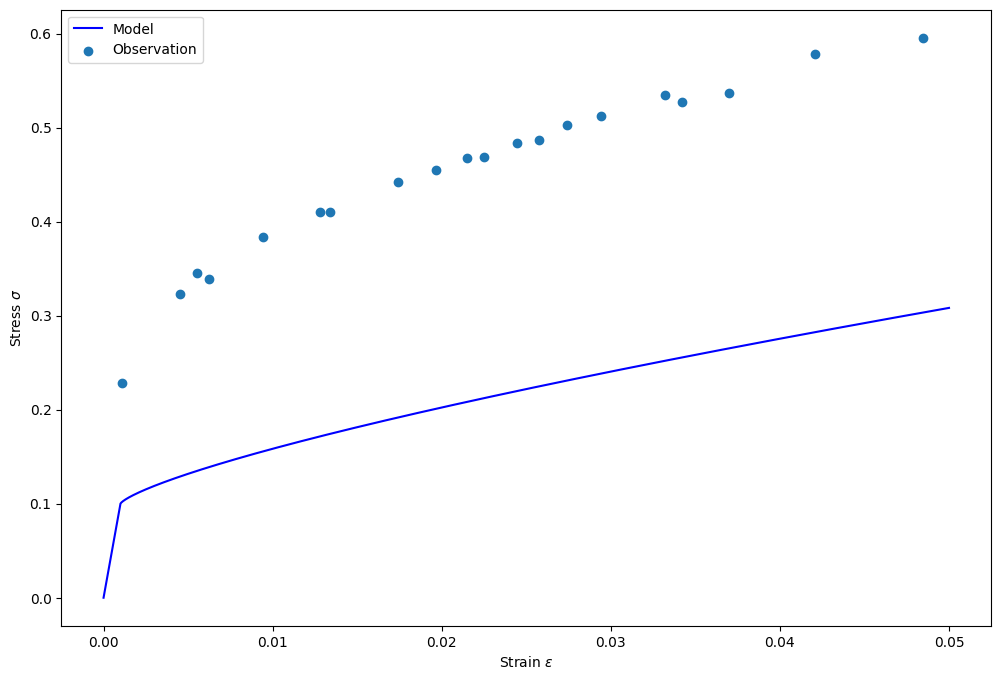

In [46]:
data = pd.read_csv('data/experimental-observations.csv')

plt.figure(figsize=(12, 8))
plt.plot(strain, stress, label='Model', color='blue')
plt.scatter(data['strain'], data['stress'], label="Observation")
plt.xlabel("Strain $\epsilon$")
plt.ylabel("Stress $\sigma$")
plt.legend()

plt.savefig("default-model.png", dpi=300, bbox_inches='tight')

### Estimate the model parameters

- $E$: Young's modulus
- $\sigma_y$: yield stress
- $H$: plastic hardening modulus
- $n$: plastic hardening modulus exponent
